<a href="https://www.kaggle.com/nandita711/cancer-classification-eda-pca-random-forest?scriptVersionId=86360500" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Breast Cancer Classification

This is a classsification problem aimed to identify and distinguish malignant cancer from benign, using measures of area, smoothness, texture etc., from a digitized image of a cell nuclei.

<div style="width:100%;text-align: center;"> <img align=middle src="https://verywellhealth.com/thmb/i8iFcl6CJWvKS7BFWgluoSCyLCI=/614x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>


> *image source* : https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240 

# Dataset

The dataset is taken from Kaggle repository - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# Methodology

SEMMA approach was used in analyzing and modeling this particular dataset. More specifically, the following steps were taken :

1. **High-Level Data Analysis** : The dataset characteristics - dimension, missing values, data types were observed.
2. **Data Exploration** : Individual variables were analysed for patterns, and hidden correations.
3. **Modifications** : Outliers were removed and PCA was performed where necessary.
4. **Modeling** : Logistic Regression, Random Forest, and XG Boost was applied, and fit performance was evaluated using metrics like Accuracy, Precision, Recall.
5. **Conclusion** : Best model was chosen based on the performance and evaluation metrics.

# Importing relevant libraries

We'll be making use of pandas and numpy to store and perform data operations, matplotlib and seaborn to visualise the data, and sci-kit learn for standardizing data, and applying the machine learning models like Regression, XG Boost, and Random Classification

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Reading the data

Reading the data using pd.read_csv

In [2]:
#Read the data
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# I. High-Level Analysis

Performing high-level analysis to find the shape of the data, check the data-types, and find missing values, if any.

In [3]:
#From priliminary glance, Unnamed:32 looks like all NaN values.Confirming the same:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [4]:
#Removing unnamed:32
df.drop(['Unnamed: 32'], axis = 1, inplace= True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Checking the dimension of the dataset
df.shape

(569, 32)

In [6]:
#Checking the datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

> Looks like all variables have the right datatypes assigned to them.

In [8]:
#number of missing values, if any
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> Looks like there are no missing values.

# II. In-depth Data Exploration

**1. Target Variable**

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

> Target variable has two classes, namely M and B. M stands for Malignant and B for Benign. 
M is the class of importance to us.

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

> There's doesn't seem to be a huge imbalanace in data

**2. Predictor Variables:**

To analyze the predictor variables and identify the variables significant to the model, we'll follow the below process.
*     Check the distribution of the individual variables
*     Find Outliers
*     Check co-relation with target

Before starting, we'll take a look at the overall correlation between variables to check if we need to deal with multi-collinearity. A heatmap is used for this purpose.

<AxesSubplot:>

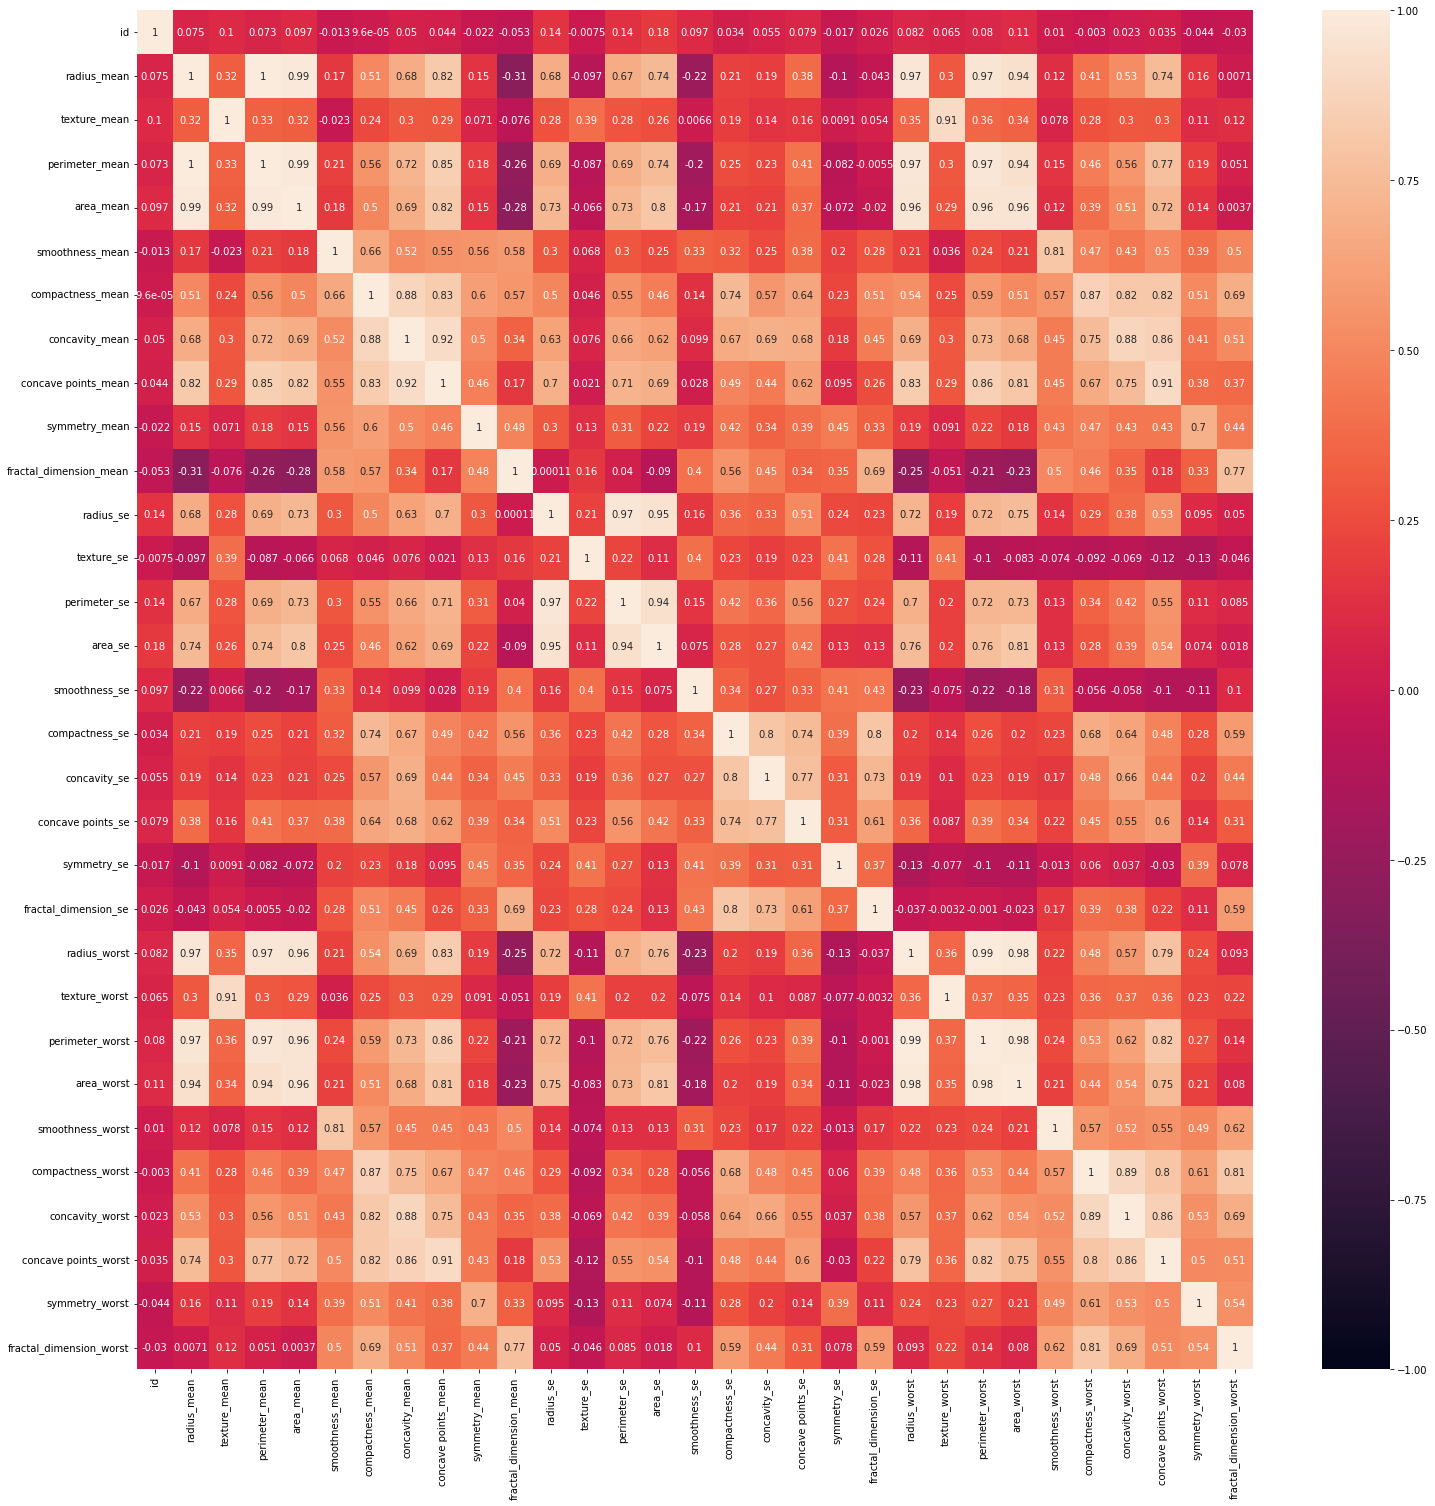

In [11]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Some of the observations from the above graph:
1. **radius_mean** is highly correlated with **perimeter_mean** and **area_mean**, which makes sense because perimeter_mean and area_mean are derived using radius as the only variable. It's also highly correlated with radius_worst, perimteter_worst and area_worst
2. **texture_mean** and **texture_worst** are highly correlated
3. **smoothness_mean** and **smoothness_worst** are correlated.
4. **compactness_mean** shows reasonably high correlation with **concavity_mean**, **concave points_mean**, **compactness_worst**, **concavity_worst** and **concave points_worst**.
5. **concave points_mean** shows a good correaltion with most variables 

Let's look at how these variables are individually related to the target variable to determine which of them can prove to be more significant to the model performance.


In [12]:
#Standardizing the data first to view it in a single graph plot
std = (df - df.mean())/ (df.std())
std_data =pd.concat([df['diagnosis'], std], axis=1)
std_data.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-8.339355e-16,-7.423275e-16,5.919889e-16,-1.081346e-15,-3.929682e-16,-2.118204e-15,9.935423e-16,-2.790191e-16,-1.732650e-16,-3.703345e-16,...,-2.346102e-15,6.083788e-15,-7.441202e-16,-5.036783e-15,-1.888550e-15,-2.796045e-16,-2.454417e-15,-6.558316e-15,-9.493480e-16,1.761138e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.453164e+00,-7.371804e-01,-1.221348e+00,-1.608721e+00,-1.296957e+00,-1.442609e+00,-1.260710e+00,-1.911765e+00,-1.743529e+00,-1.113893e+00,...,-1.725382e+00,-3.109349e+00,-1.774504e+00,-2.680337e+00,-2.741705e+00,-1.531542e+00,-2.159060e+00,-2.227289e+00,-1.552898e+00,-2.222039e+00
25%,-6.666089e-01,-4.943192e-01,-6.415713e-01,-7.464292e-01,-6.923171e-01,-6.804845e-01,-7.372951e-01,-6.738971e-01,-7.557349e-01,-7.430941e-01,...,-6.743279e-01,-7.103378e-01,-6.234697e-01,-6.906227e-01,-7.026215e-01,-6.511078e-01,-6.412994e-01,-7.253249e-01,-6.941984e-01,-7.479711e-01
50%,-2.949274e-01,-3.474770e-01,-3.408813e-01,-2.217454e-01,-2.807733e-01,-2.692639e-01,-3.973715e-01,-1.403723e-01,-2.232725e-01,-3.419391e-01,...,-2.688030e-01,-3.486040e-02,-2.201415e-01,-4.680159e-02,-7.156354e-02,-2.192375e-01,-1.272975e-01,-1.045442e-01,-1.973239e-01,-4.347738e-02
75%,3.631877e-01,1.066787e-01,3.572747e-01,4.934227e-01,3.893116e-01,5.391944e-01,6.463664e-01,4.722412e-01,7.118836e-01,5.255994e-01,...,5.215568e-01,6.356397e-01,3.680315e-01,5.970195e-01,5.303125e-01,3.553798e-01,4.497425e-01,5.836621e-01,4.661422e-01,6.577623e-01
max,5.245913e+00,1.103214e+01,5.924959e+00,4.564409e+00,6.138081e+00,5.108382e+00,3.924477e+00,6.643755e+00,2.683516e+00,4.239858e+00,...,4.090590e+00,4.766717e+00,8.022940e+00,3.951897e+00,4.480808e+00,7.065700e+00,6.040726e+00,4.647799e+00,6.649429e+00,3.882489e+00


Categorizing the data into the following sets of variables, for ease of analysis, and visualizing:
*     **SET 1** : radius_mean, perimeter_mean, area_mean, radius_se, area_se, perimeter_se, radius_worst, perimeter_worst, area_worst
*     **SET 2** : texture_mean, texture_worst
*     **SET 3** : smoothness_mean, smoothness_worst
*     **SET 4** : compactness_mean, concavity_mean, concave_points_mean, compactness_worst, concavity_worst, concave_points_worst

# SET 1 - Radius, Area, Perimeter

In [13]:
#Creating set1 dataframe
set1 = pd.concat([df['diagnosis'], std['radius_mean'], std['perimeter_mean'], std['area_mean'],std['radius_se'], std['perimeter_se'],std['area_se'], std['radius_worst'],std['perimeter_worst'],std['area_worst']], axis=1)
set1.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst
0,M,1.096100,1.268817,0.983510,2.487545,2.830540,2.485391,1.885031,2.301575,1.999478
1,M,1.828212,1.684473,1.907030,0.498816,0.263095,0.741749,1.804340,1.533776,1.888827
2,M,1.578499,1.565126,1.557513,1.227596,0.850180,1.180298,1.510541,1.346291,1.455004
3,M,-0.768233,-0.592166,-0.763792,0.326087,0.286341,-0.288125,-0.281217,-0.249720,-0.549538
4,M,1.748758,1.775011,1.824624,1.269426,1.272070,1.189310,1.297434,1.337363,1.219651


<AxesSubplot:xlabel='variable', ylabel='value'>

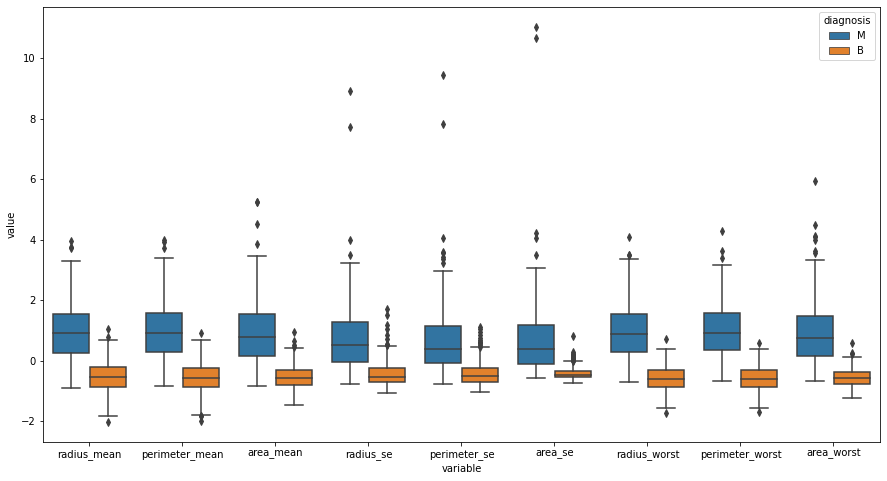

In [14]:
plt.figure(figsize = (15, 8))
sns.boxplot(x="variable", y="value", hue = 'diagnosis' , data=pd.melt(set1, id_vars='diagnosis'))

Observations:
* Almost all variables show a good amount of separation, and no overlap
* Few variables like radius_se, perimeter_se, and area_se have a lot of outliers.
* radius_mean might be a good predictor to go ahead with

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

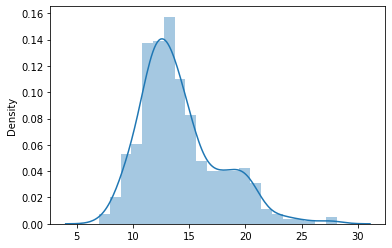

In [15]:
#Taking a closer look at radius_mean

sns.distplot(x=df['radius_mean'] )

> Almost linear with one or more points that seem to be outliers

Analysing outliers in radius_mean :

In [16]:
#Defining upper and lower limits to identify outliers
#Tail =1
def outlier_limits(df, variable_name):
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    interval=3*iqr
    upper_l= q3+interval
    lower_l= q1-interval
    return lower_l, upper_l

In [17]:
#Checking the upper and lower limits

lower, upper = outlier_limits(df, 'radius_mean')
print(upper, lower)

28.02 -0.5400000000000009


In [18]:
#Calculating the number of outliers, including -ve values
outliers=[i for i in df['radius_mean'] if i>upper or i<0]
len(outliers)

1

> Since there's just one outlier, we'll go ahead and delete it

# SET 2 - Texture

In [19]:
#SET 2 
set2 = pd.concat([df['diagnosis'], std['texture_mean'], std['texture_worst']], axis=1)
set2

,diagnosis,texture_mean,texture_worst
0,M,-2.071512,-1.358098
1,M,-0.353322,-0.368879
2,M,0.455786,-0.023953
3,M,0.253509,0.133866
4,M,-1.150804,-1.465481
...,...,...,...
564,M,0.720838,0.117596
565,M,2.083301,2.045599
566,M,2.043775,1.373645
567,M,2.334403,2.235958


<AxesSubplot:xlabel='variable', ylabel='value'>

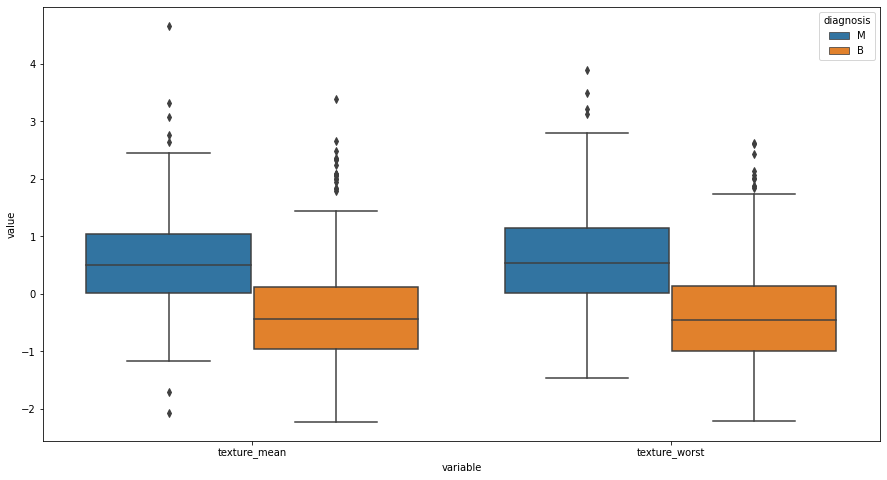

In [20]:
plt.figure(figsize = (15, 8))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis", data = pd.melt(set2, id_vars = "diagnosis"))

Looking at outliers and variable overlap, texture_worst looks like a better variable for the model


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

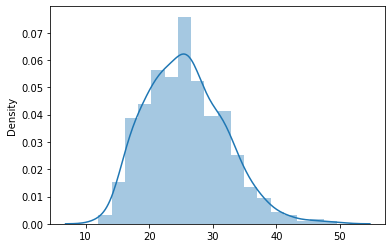

In [21]:
#Deeper look at texture_worst
sns.distplot(x=df['texture_worst'] )

>Looks almost normal without any outliers

In [22]:
#performing outlier check to confirm
lower, upper = outlier_limits(df, 'texture_worst')
outliers=[i for i in df['texture_worst'] if i>upper or i<0]
len(outliers)

0

# SET 3 - Smoothness

In [23]:
#SET 3
set3 = pd.concat([df['diagnosis'], std['smoothness_mean'], std['smoothness_worst']], axis=1)
set3.head()

,diagnosis,smoothness_mean,smoothness_worst
0,M,1.567087,1.306537
1,M,-0.826235,-0.375282
2,M,0.941382,0.526944
3,M,3.280667,3.391291
4,M,0.280125,0.220362


<AxesSubplot:xlabel='variable', ylabel='value'>

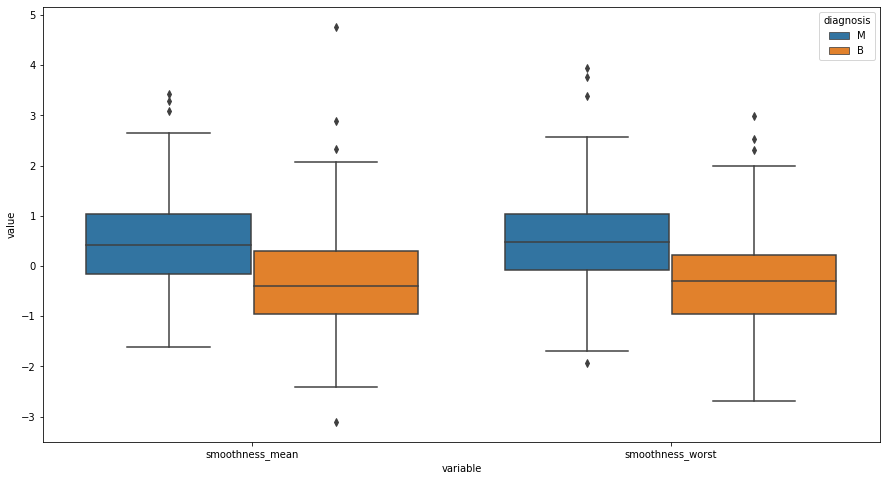

In [24]:
plt.figure(figsize = (15, 8))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis", data = pd.melt(set3, id_vars = "diagnosis"))

Quite an overlap within the two varibles, might not act as good predictor variables. smoothness_worst, however, seems to be the better option considering separation and outlier distribution


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

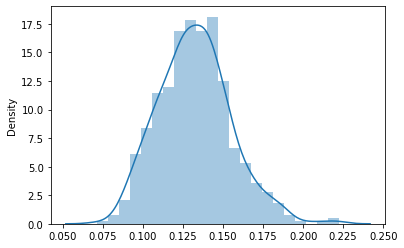

In [25]:
#Deeper look at smoothness_worst
sns.distplot(x=df['smoothness_worst'] )

>Looks normal without any outliers

In [26]:
#performing outlier check to confirm
lower, upper = outlier_limits(df, 'smoothness_worst')
outliers=[i for i in df['smoothness_worst'] if i>upper or i<0]
len(outliers)

0

# SET 4 - Compactness, Concavity

In [27]:
#SET 4 
set4 = pd.concat([df['diagnosis'], std['compactness_mean'], std['concavity_mean'], std['concave points_mean'], std['compactness_worst'], std['concavity_worst'], std['concave points_worst']], axis=1)
set4.head()

,diagnosis,compactness_mean,concavity_mean,concave points_mean,compactness_worst,concavity_worst,concave points_worst
0,M,3.280628,2.650542,2.530249,2.614365,2.107672,2.294058
1,M,-0.486643,-0.023825,0.547662,-0.430066,-0.146620,1.086129
2,M,1.052000,1.362280,2.035440,1.081980,0.854222,1.953282
3,M,3.399917,1.914213,1.450431,3.889975,1.987839,2.173873
4,M,0.538866,1.369806,1.427237,-0.313119,0.612640,0.728618


<AxesSubplot:xlabel='variable', ylabel='value'>

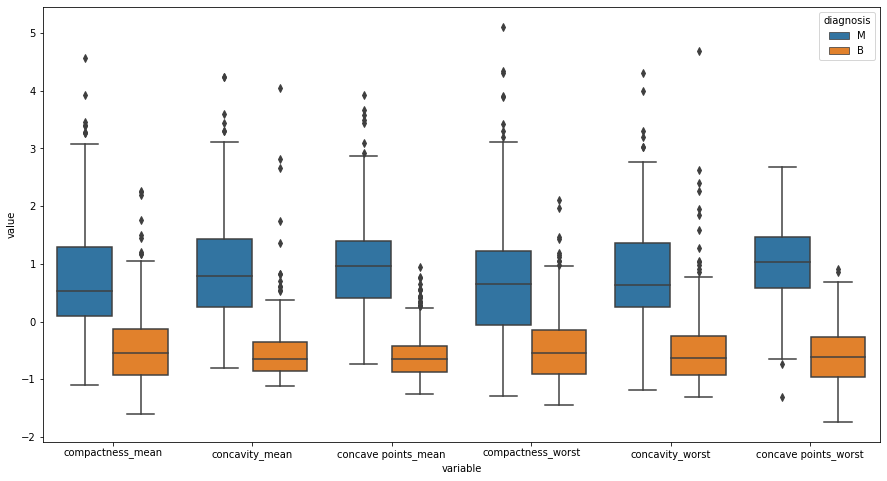

In [28]:
plt.figure(figsize = (15, 8))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis", data = pd.melt(set4, id_vars = "diagnosis"))

Since there's not a very high correlation, a better approach might be to apply PCA on these variables, instead of compeltely discarding few of them


# III. Modifications

# Applying PCA 

Applying Principal component analysis (PCA) to the variables to reduce the dimensionality without losing a lot of information. First step is to ensure the variables are standardised:

* Standardising the variables using StandardScaler() to unit scale that is a mean of 0, and variance of 1


In [29]:
data_for_pca = pd.concat([df['compactness_mean'], df['concavity_mean'], df['concave points_mean'], df['compactness_worst'], df['concavity_worst'], df['concave points_worst']], axis=1)

#Standarding the data
scaler = StandardScaler()
scaler.fit_transform(data_for_pca)
data_for_pca.head()

,compactness_mean,concavity_mean,concave points_mean,compactness_worst,concavity_worst,concave points_worst
0,0.27760,0.3001,0.14710,0.6656,0.7119,0.2654
1,0.07864,0.0869,0.07017,0.1866,0.2416,0.1860
2,0.15990,0.1974,0.12790,0.4245,0.4504,0.2430
3,0.28390,0.2414,0.10520,0.8663,0.6869,0.2575
4,0.13280,0.1980,0.10430,0.2050,0.4000,0.1625


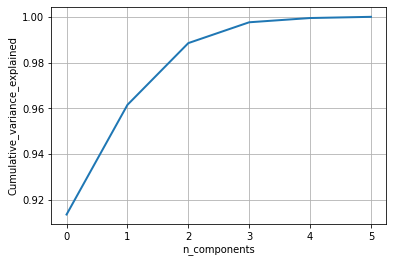

In [30]:
pca= PCA()
pca.n_components = 6
pca_data = pca.fit_transform(data_for_pca)

variance_explained=pca.explained_variance_ratio_
cumulative_ve=np.cumsum(variance_explained)

def pca_graph(cumulative_variance):    
    plt.figure(1, figsize=(6, 4))
    plt.clf()
    plt.plot(cumulative_variance, linewidth=2)
    plt.axis('tight')
    plt.grid()
    plt.xlabel('n_components')
    plt.ylabel('Cumulative_variance_explained')
    plt.show()
    
pca_graph(cumulative_ve)

In [31]:
#Adding some more more concavity variables to see if we're able to retain this much information
data_for_pca2 = pd.concat([df['compactness_mean'], df['concavity_mean'], df['concave points_mean'], df['compactness_worst'], df['concavity_worst'], df['concave points_worst'], df['concave points_se'], df['concavity_se'], df['compactness_se']], axis=1)

#Standarding the data
scaler = StandardScaler()
scaler.fit_transform(data_for_pca2)
data_for_pca2.head()

,compactness_mean,concavity_mean,concave points_mean,compactness_worst,concavity_worst,concave points_worst,concave points_se,concavity_se,compactness_se
0,0.27760,0.3001,0.14710,0.6656,0.7119,0.2654,0.01587,0.05373,0.04904
1,0.07864,0.0869,0.07017,0.1866,0.2416,0.1860,0.01340,0.01860,0.01308
2,0.15990,0.1974,0.12790,0.4245,0.4504,0.2430,0.02058,0.03832,0.04006
3,0.28390,0.2414,0.10520,0.8663,0.6869,0.2575,0.01867,0.05661,0.07458
4,0.13280,0.1980,0.10430,0.2050,0.4000,0.1625,0.01885,0.05688,0.02461


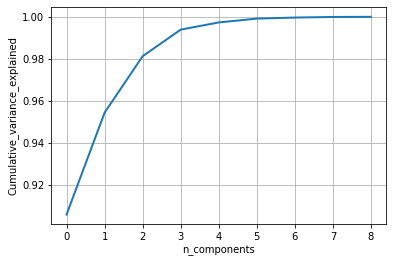

In [32]:
pca= PCA()
pca.n_components = 9
pca_data2 = pca.fit_transform(data_for_pca2)

variance_explained=pca.explained_variance_ratio_
cumulative_ve=np.cumsum(variance_explained) 
pca_graph(cumulative_ve)

> From the above graph, we can deduce that using just three out of the nine components,we're able to retain more than 98% variance

In [33]:
#Applying PCA and reducing it to 3 variables

pca.n_components = 3
pca_data2=pca.fit_transform(data_for_pca2)
p_components = pd.DataFrame(data=pca_data2, columns = ['PC 1', 'PC 2', 'PC 3'])
p_components

,PC 1,PC 2,PC 3
0,0.676848,-0.049252,-0.093444
1,-0.048058,0.053779,-0.036141
2,0.298253,0.002135,-0.087681
3,0.747212,-0.249221,-0.081865
4,0.119391,0.148049,-0.034300
...,...,...,...
564,0.155861,0.178812,-0.083451
565,0.033401,0.105353,-0.034066
566,0.088710,-0.010017,0.015313
567,0.969770,-0.101159,-0.024758


In [34]:
#Confirming the data from the graph 

pca.explained_variance_ratio_

array([0.90595479, 0.04848406, 0.02684131])

In [35]:
#Putting together all the chosen variables and the principal components:
final_df=pd.concat([df['diagnosis'],df['radius_mean'], df['texture_worst'], df['smoothness_worst'],p_components], axis=1)
final_df

,diagnosis,radius_mean,texture_worst,smoothness_worst,PC 1,PC 2,PC 3
0,M,17.99,17.33,0.16220,0.676848,-0.049252,-0.093444
1,M,20.57,23.41,0.12380,-0.048058,0.053779,-0.036141
2,M,19.69,25.53,0.14440,0.298253,0.002135,-0.087681
3,M,11.42,26.50,0.20980,0.747212,-0.249221,-0.081865
4,M,20.29,16.67,0.13740,0.119391,0.148049,-0.034300
...,...,...,...,...,...,...,...
564,M,21.56,26.40,0.14100,0.155861,0.178812,-0.083451
565,M,20.13,38.25,0.11660,0.033401,0.105353,-0.034066
566,M,16.60,34.12,0.11390,0.088710,-0.010017,0.015313
567,M,20.60,39.42,0.16500,0.969770,-0.101159,-0.024758


# Removing Outliers

In [36]:
#Deleting the outliers from the final dataset
lower, upper = outlier_limits(df, 'radius_mean')
final_df.drop(final_df.loc[df['radius_mean']>upper].index, inplace = True)
outliers=[i for i in final_df['radius_mean'] if i>upper or i<0]
len(outliers)

0

In [37]:
final_df

,diagnosis,radius_mean,texture_worst,smoothness_worst,PC 1,PC 2,PC 3
0,M,17.99,17.33,0.16220,0.676848,-0.049252,-0.093444
1,M,20.57,23.41,0.12380,-0.048058,0.053779,-0.036141
2,M,19.69,25.53,0.14440,0.298253,0.002135,-0.087681
3,M,11.42,26.50,0.20980,0.747212,-0.249221,-0.081865
4,M,20.29,16.67,0.13740,0.119391,0.148049,-0.034300
...,...,...,...,...,...,...,...
564,M,21.56,26.40,0.14100,0.155861,0.178812,-0.083451
565,M,20.13,38.25,0.11660,0.033401,0.105353,-0.034066
566,M,16.60,34.12,0.11390,0.088710,-0.010017,0.015313
567,M,20.60,39.42,0.16500,0.969770,-0.101159,-0.024758


# III. Modeling 

In this last stage, we'll be applying the various classification machine learning models on our final dataset, and pick the best performing model.

In [38]:
#Importing the relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import xgboost


#Splitting the data

y = final_df['diagnosis']
X = final_df.drop(['diagnosis'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)


#Creating a function to calculate accuracy/precision scores

def scores(target_test, predicted):
    ac=accuracy_score(target_test, predicted)
    precision = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[0]
    recall = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[1]
    fscore = precision_recall_fscore_support(target_test, predicted, labels = ['M'])[2]
    print(f" Accuracy is {ac}")
    print(f" Precision is {precision}")
    print(f" Recall is {recall}")
    print(f" F Score is {fscore}")

# Logistic Regression

In [39]:
#Applying Logistic Regression

lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
pred = lr.predict(X_test)
scores(y_test, pred)

 Accuracy is 0.9436619718309859
 Precision is [0.90740741]
 Recall is [0.94230769]
 F Score is [0.9245283]


# Random Forest Classifier

In [40]:
#Applying Random Forest 

rf = RandomForestClassifier(random_state = 42)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
scores(y_test, pred)

 Accuracy is 0.9647887323943662
 Precision is [0.94339623]
 Recall is [0.96153846]
 F Score is [0.95238095]


# XGBoost

In [41]:
xgb = xgboost.XGBClassifier()
xgb = xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
scores(y_test, pred)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:25:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Accuracy is 0.9577464788732394
 Precision is [0.92592593]
 Recall is [0.96153846]
 F Score is [0.94339623]


# IV. Conclusion

Overall, Random Classifier gives the best results with an  accuracy of 96.7% and a precision of 94.3%